# Yapay Sinir Ağları

***İnsan beyninin bilgi işleme şeklini referans alan sınıflandırma ve regresyon problemleri için kullanılabilen kuvvetli makine öğrenmesi algoritmalarından birisidir.***

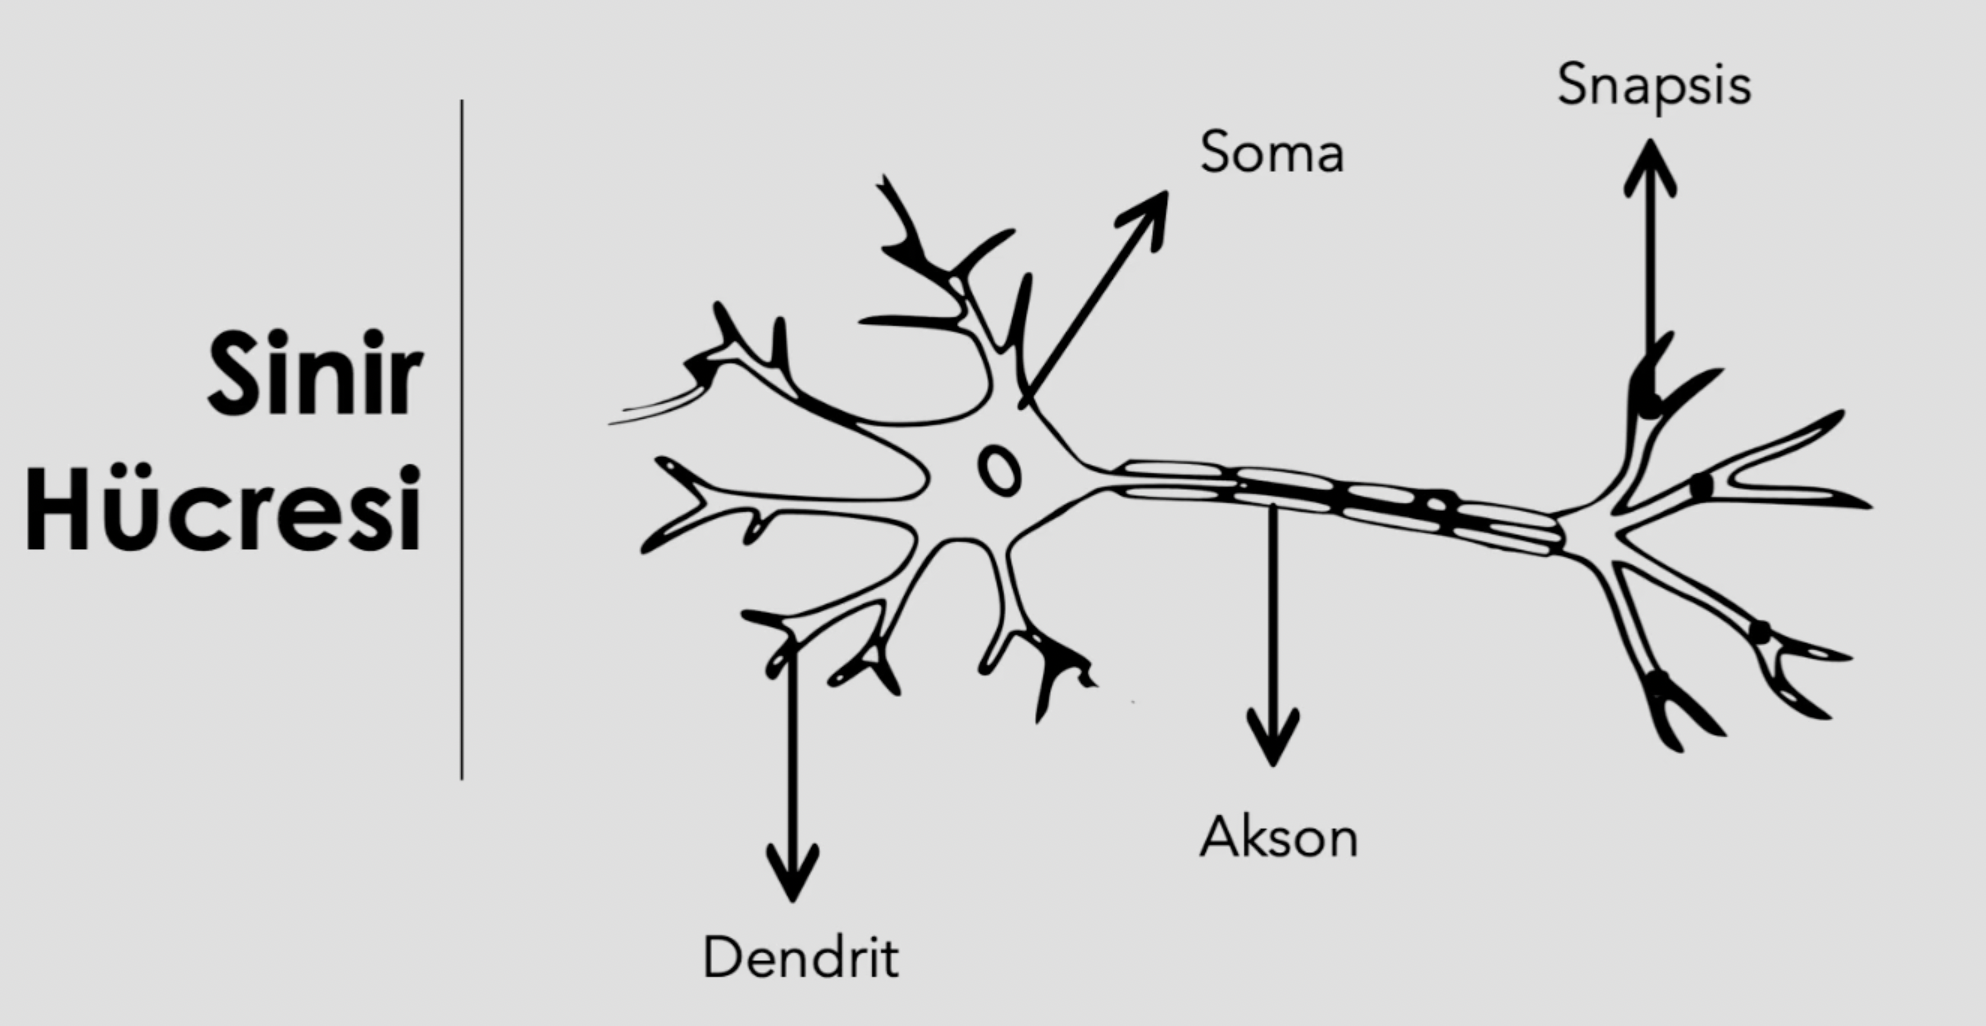

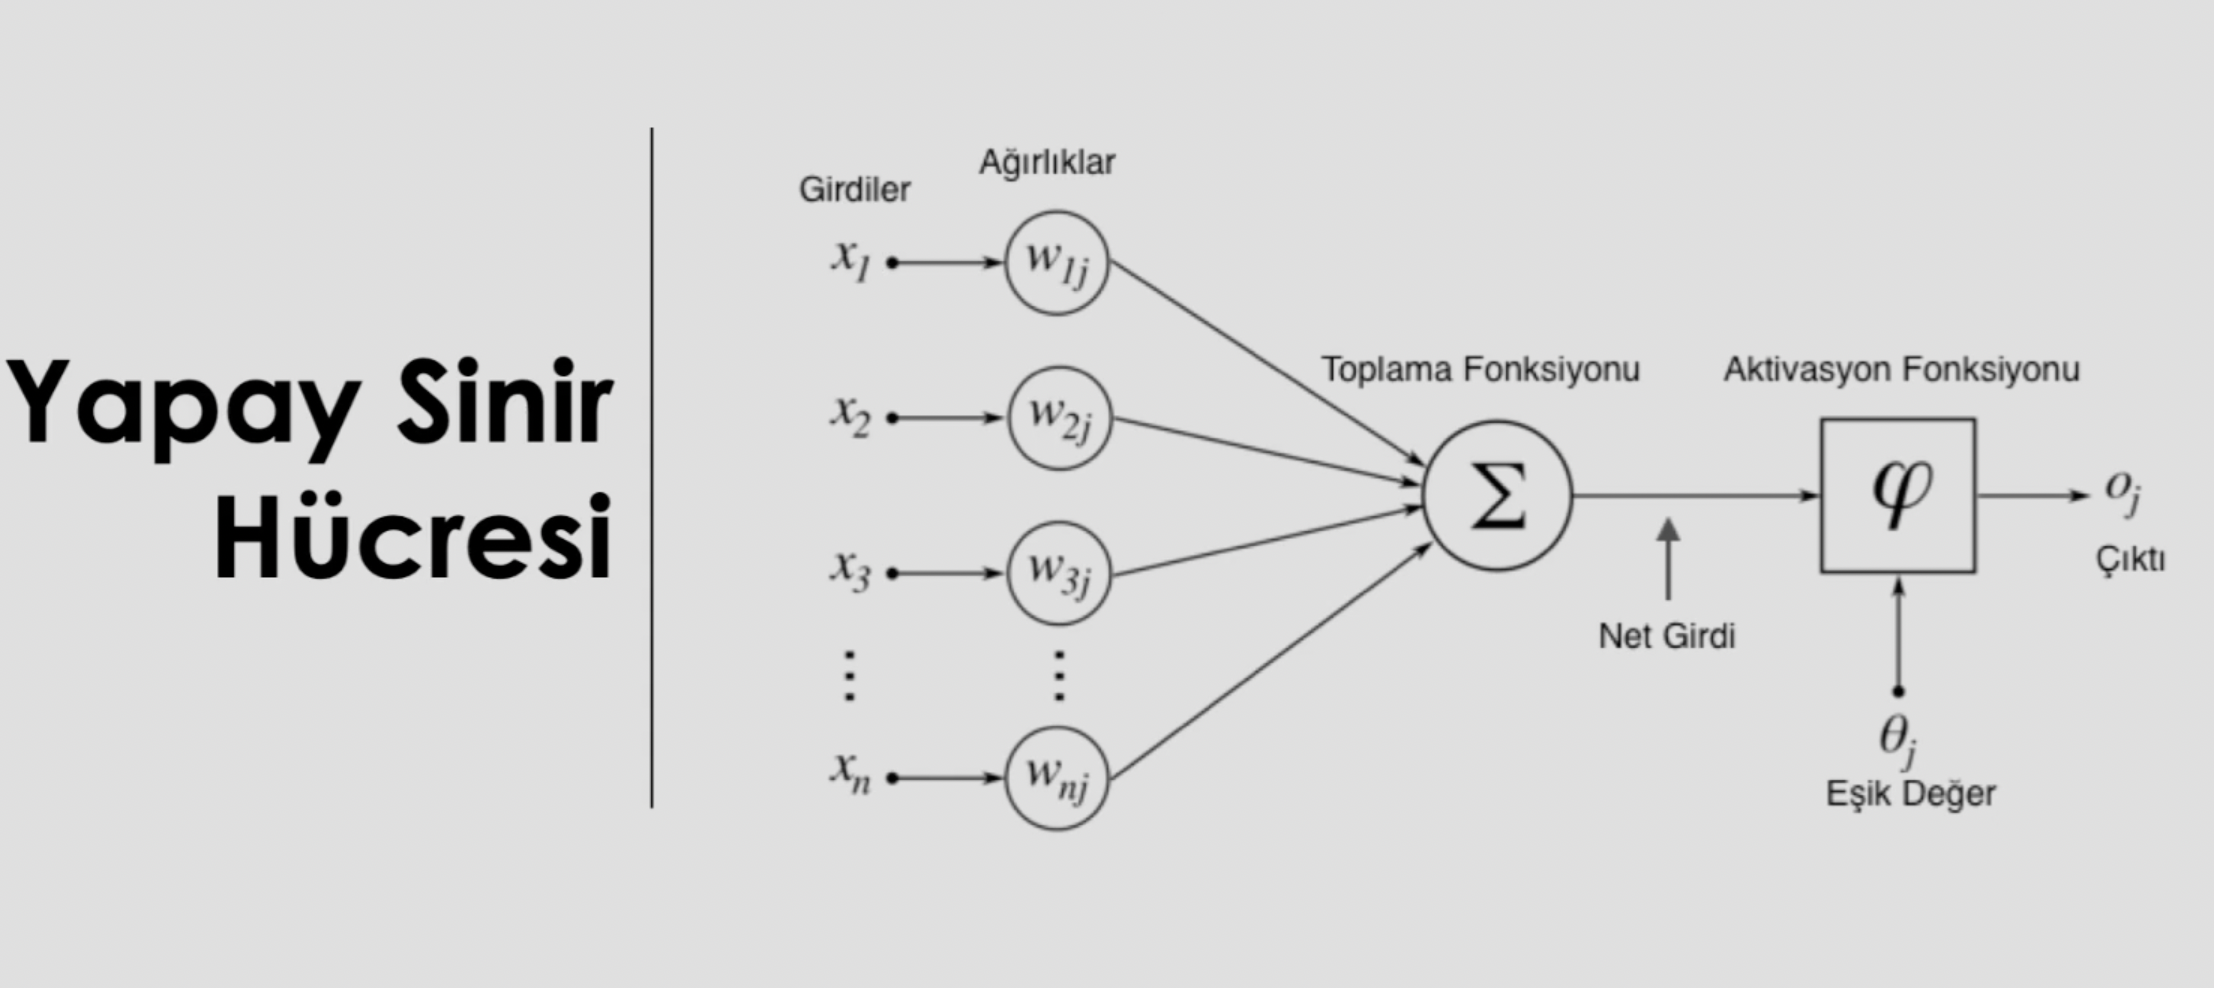

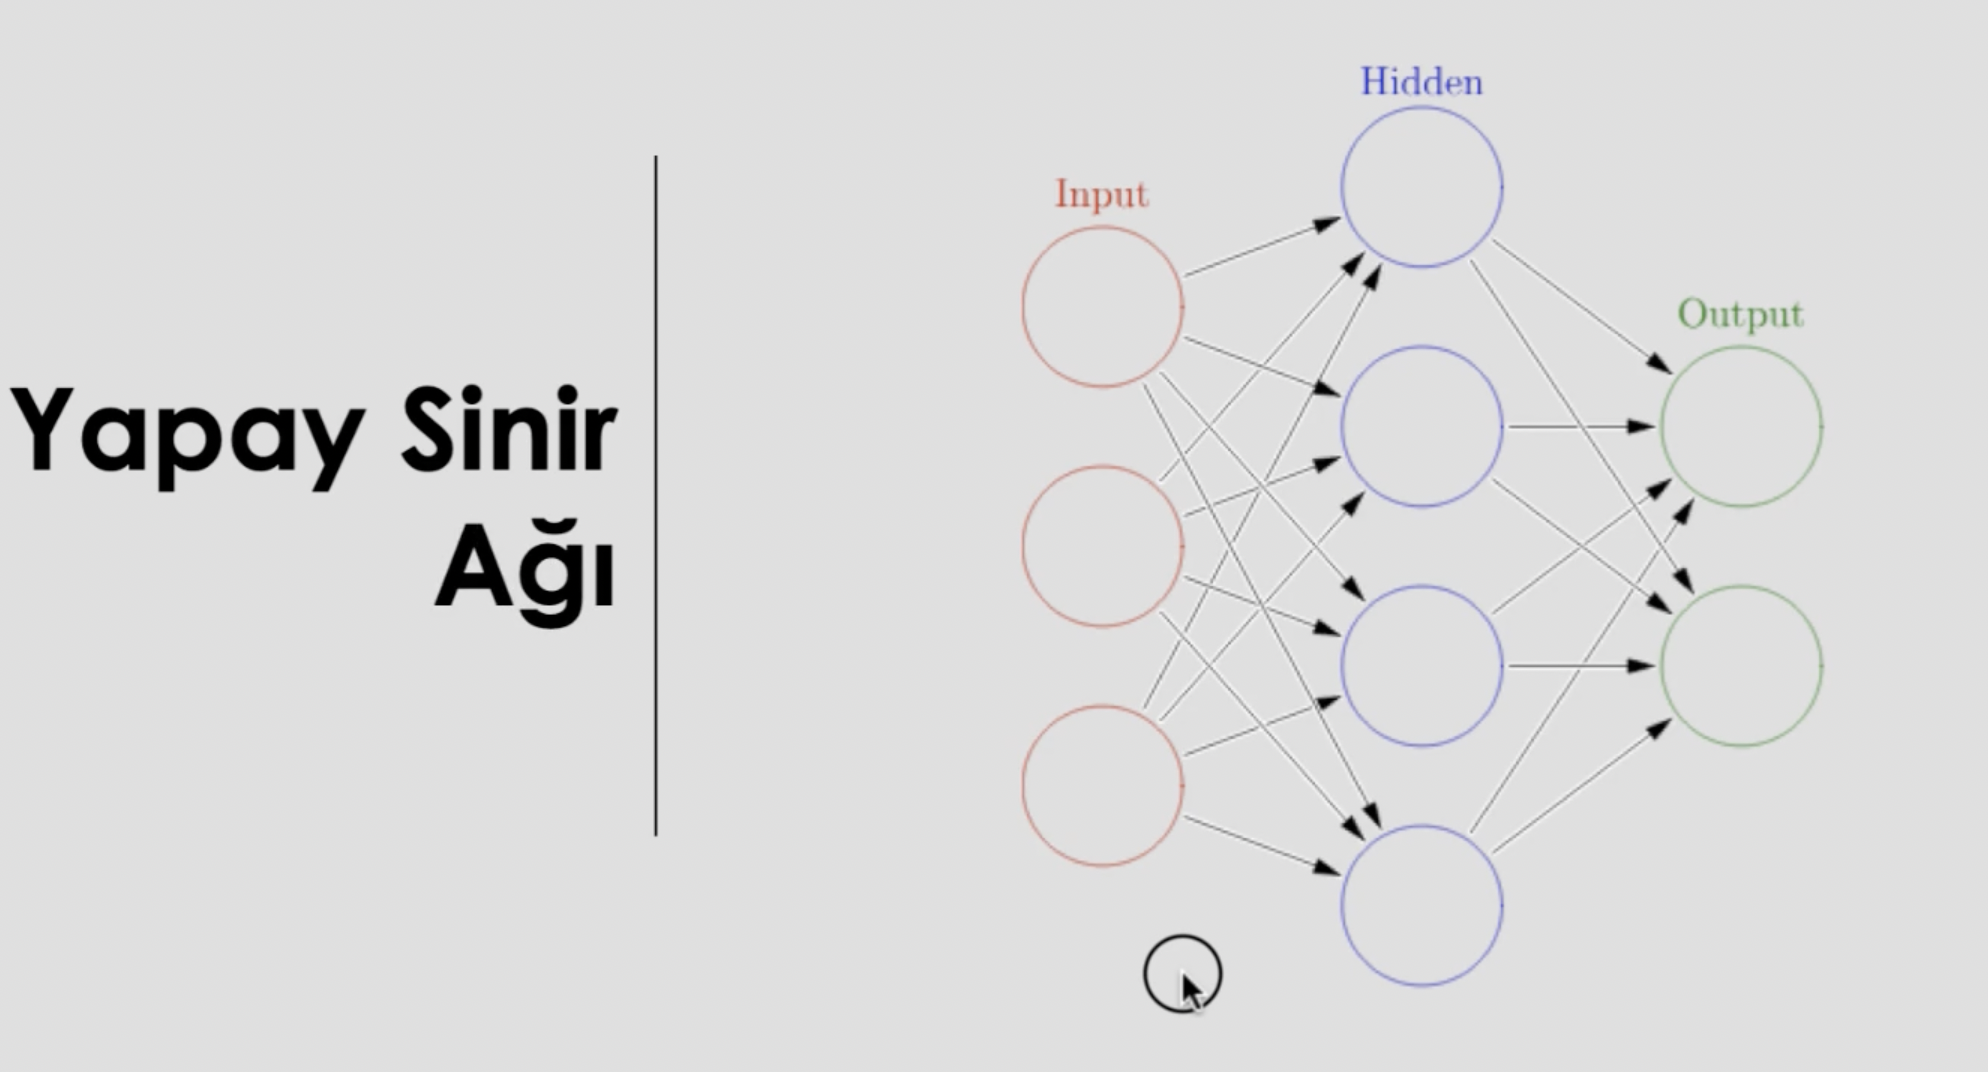

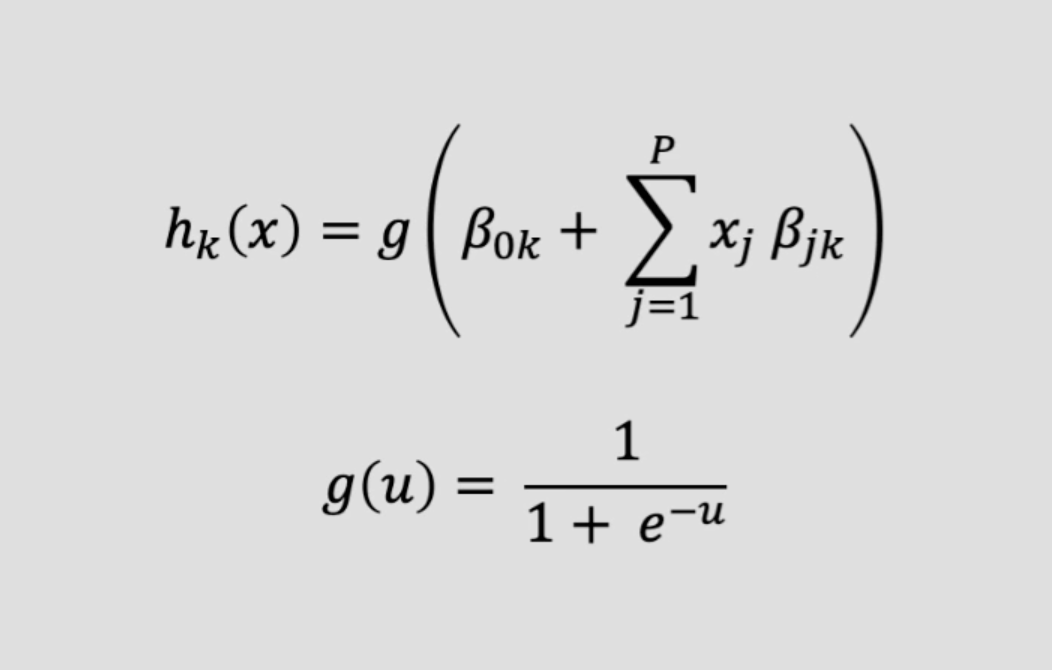

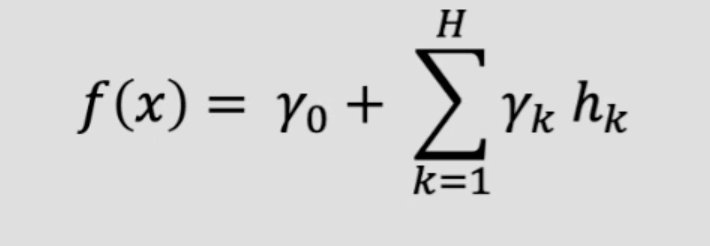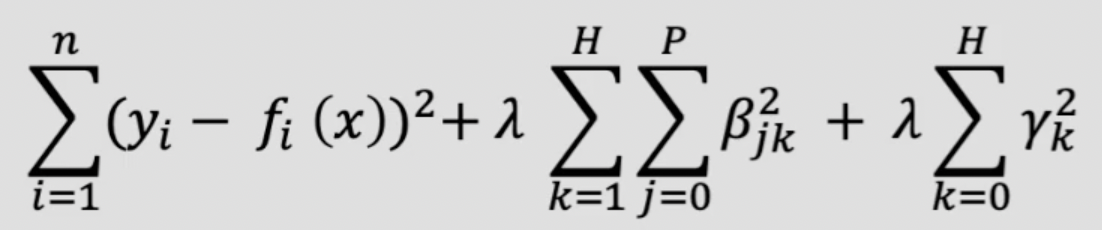

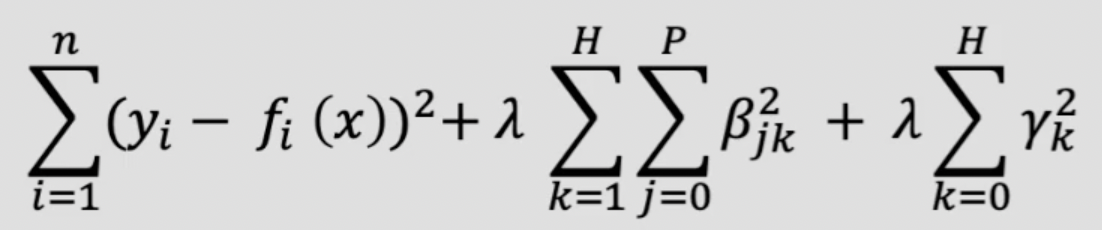

**Lambda parametresi genel olarak 0-0.1 arasında değerler alır.**

**Katmanların bizim değişkenlerimizin doğrusal kombinasyonlarını farklı katmanlarda yeni değişken setleri oluşturmak üzere oluşturan bir yapısı vardır.**

# Çok Katmanlı Algılayıcı

In [44]:
import numpy as np
import pandas as pd 
from sklearn.model_selection import train_test_split, GridSearchCV,cross_val_score
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale 
from sklearn import model_selection
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.model_selection import GridSearchCV

from warnings import filterwarnings
filterwarnings('ignore')

In [45]:
hit = pd.read_csv("Hitters.csv")
df = hit.copy()
df = df.dropna()
dms = pd.get_dummies(df[['League', 'Division', 'NewLeague']])
y = df["Salary"]
X_ = df.drop(['Salary', 'League', 'Division', 'NewLeague'], axis=1).astype('float64')
X = pd.concat([X_, dms[['League_N', 'Division_W', 'NewLeague_N']]], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.25, 
                                                    random_state=42)

In [46]:
from sklearn.preprocessing import StandardScaler

In [47]:
scaler = StandardScaler()
scaler.fit(X_train)

StandardScaler()

In [48]:
X_train_scaled = scaler.transform(X_train)

In [49]:
X_test_scaled = scaler.transform(X_test)

In [50]:
from sklearn.neural_network import MLPRegressor

In [57]:
mlp_model = MLPRegressor(hidden_layer_sizes = (100,20)).fit(X_train_scaled, y_train)

In [58]:
mlp_model.n_layers_

4

In [59]:
mlp_model.hidden_layer_sizes

(100, 20)

# Tahmin

In [60]:
mlp_model.predict(X_train_scaled)[0:5]

array([ 89.42969897, 449.08506741, 276.65933724,  67.55937358,
        63.09132529])

In [61]:
y_pred = mlp_model.predict(X_test_scaled)

In [62]:
np.sqrt(mean_squared_error(y_test, y_pred))

437.17606253967534

# Model Tuning

In [63]:
mlp_model

MLPRegressor(hidden_layer_sizes=(100, 20))

In [64]:
mlp_params = {'alpha':[0.1,0.01,0.02,0.005],
             'hidden_layer_sizes': [(20,20),(100,50,150),(300,200,150)],
             'activation': ['relu','logistic']}

In [65]:
mlp_cv_model = GridSearchCV(mlp_model,mlp_params,cv = 10)

In [67]:
mlp_cv_model.fit(X_train_scaled, y_train)

GridSearchCV(cv=10, estimator=MLPRegressor(hidden_layer_sizes=(100, 20)),
             param_grid={'activation': ['relu', 'logistic'],
                         'alpha': [0.1, 0.01, 0.02, 0.005],
                         'hidden_layer_sizes': [(20, 20), (100, 50, 150),
                                                (300, 200, 150)]})

In [68]:
mlp_cv_model.best_params_

{'activation': 'relu', 'alpha': 0.01, 'hidden_layer_sizes': (100, 50, 150)}

In [70]:
mlp_tuned = MLPRegressor(alpha = 0.02, 
                         hidden_layer_sizes =  (100, 50, 150))

In [71]:
mlp_tuned.fit(X_train_scaled, y_train)

MLPRegressor(alpha=0.02, hidden_layer_sizes=(100, 50, 150))

In [72]:
y_pred = mlp_tuned.predict(X_test_scaled)

In [73]:
np.sqrt(mean_squared_error(y_test, y_pred))

355.6554295332929